## データ分析の流れ  
①データの取り込み　▶無事取り込めてデータフレームに格納できていればOK  
②データ探索(EDA)　▶欠損はないか？異常値はないか？学習モデルが予測しやすいデータの形になっているか？追加すべき特徴量はないか？  
③データの前処理　▶探索した結果を元にデータを加工し、最終的に「欠損がなくintまたはfloatだけのデータ」にする  
④モデル作成、評価　▶処理したデータを使ってモデルを作成し、スコアの評価を実施、ベースラインモデル(機械学習を使わず予測したもの)を上回っているかを確認する  
⑤予測　▶作成したモデルを使って、予測用データを入力して予測値の出力を行う  

## データの取り込み、確認

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
sns.set(font = "IPAexGothic", style = "white")
pd.set_option('display.max_columns', 150)

In [153]:
#データの取り込み
df_train_master = pd.read_csv("ds_salaries_train.csv")
df_submit_master = pd.read_csv("ds_salaries_test.csv")
display(df_train_master.head())
display(df_submit_master.head())

,index,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary
0,1282,2023,SE,FT,Data Science Lead,US,NaN,US,M,225900
1,220,2023,SE,FT,Data Analyst,US,NaN,US,M,140000
2,3568,2021,SE,FT,Data Engineer,US,100.0,US,M,150000
3,129,2023,MI,FT,Data Analytics Manager,US,NaN,US,M,155000
4,1216,2023,SE,FT,Data Engineer,US,100.0,US,M,160000


,index,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2494,2022,SE,FT,Data Scientist,US,NaN,US,M
1,2534,2022,SE,FT,Data Engineer,US,NaN,US,M
2,380,2023,SE,FT,Data Engineer,US,NaN,US,M
3,2472,2022,EN,FT,Data Scientist,FR,50.0,FR,L
4,1876,2022,EN,FT,Data Engineer,US,NaN,US,M


## データ探索(EDA)

In [154]:
#学習データのサマリ
display(df_train_master.info())
display(df_train_master.describe())
display(df_train_master.describe(include="object"))

#employment_typeとremote_rationに欠損あり
#remote_ratioの最小値は50(0がないのは不自然?)
#カテゴリー変数はユニーク数が多いため、one-hot encoding以外の方法を考える必要がある

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               3004 non-null   int64  
 1   work_year           3004 non-null   int64  
 2   experience_level    3004 non-null   object 
 3   employment_type     2992 non-null   object 
 4   job_title           3004 non-null   object 
 5   employee_residence  3004 non-null   object 
 6   remote_ratio        1486 non-null   float64
 7   company_location    3004 non-null   object 
 8   company_size        3004 non-null   object 
 9   salary              3004 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.8+ KB


None

,index,work_year,remote_ratio,salary
count,3004.000000,3004.000000,1486.000000,3004.000000
mean,1879.023968,2022.376831,95.053836,137750.422104
std,1080.939568,0.685570,14.932975,62594.504028
min,0.000000,2020.000000,50.000000,5132.000000
25%,942.750000,2022.000000,100.000000,95000.000000
50%,1870.500000,2022.000000,100.000000,135000.000000
75%,2813.250000,2023.000000,100.000000,175152.000000
max,3754.000000,2023.000000,100.000000,430967.000000


,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,3004,2992,3004,3004,3004,3004
unique,4,3,91,71,67,3
top,SE,FT,Data Engineer,US,US,M
freq,2028,2976,844,2409,2438,2526


In [155]:
#予測用データ
display(df_submit_master.info())
display(df_submit_master.describe())
display(df_submit_master.describe(include="object"))

#trainデータと基本は同じ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               751 non-null    int64  
 1   work_year           751 non-null    int64  
 2   experience_level    751 non-null    object 
 3   employment_type     746 non-null    object 
 4   job_title           751 non-null    object 
 5   employee_residence  751 non-null    object 
 6   remote_ratio        346 non-null    float64
 7   company_location    751 non-null    object 
 8   company_size        751 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 52.9+ KB


None

,index,work_year,remote_ratio
count,751.000000,751.000000,346.000000
mean,1868.904128,2022.360852,93.930636
std,1097.436189,0.714804,16.352488
min,6.000000,2020.000000,50.000000
25%,904.000000,2022.000000,100.000000
50%,1893.000000,2022.000000,100.000000
75%,2823.000000,2023.000000,100.000000
max,3750.000000,2023.000000,100.000000


,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,751,746,751,751,751,751
unique,4,2,56,41,38,3
top,SE,FT,Data Engineer,US,US,M
freq,488,742,196,595,602,627


/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_8722/1631311789.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train_master["salary"])


<Axes: xlabel='salary', ylabel='Density'>

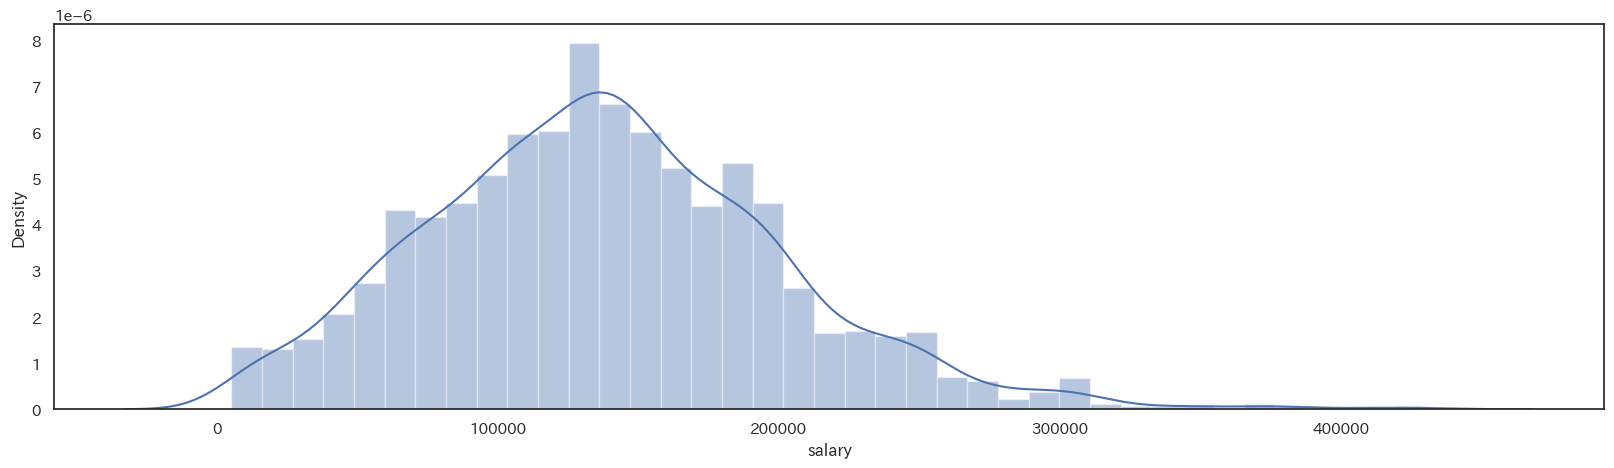

In [156]:
#salary
fig = plt.subplots(figsize=(20,5))
sns.distplot(df_train_master["salary"])

#思ったより外れ値は少なく、正規分布に近い形

work_year,2020,2021,2022,2023
count,54.000000,191.000000,1328.000000,1431.000000
mean,79076.444444,96354.837696,133526.871988,149409.280224
std,59038.003556,68883.324275,59583.045309,60517.976895
min,5707.000000,5409.000000,5132.000000,7000.000000
25%,39061.000000,50000.000000,93700.000000,108500.000000
50%,71069.500000,82744.000000,131300.000000,145000.000000
75%,105000.000000,128610.500000,173500.000000,185000.000000
max,260000.000000,423000.000000,430967.000000,385000.000000


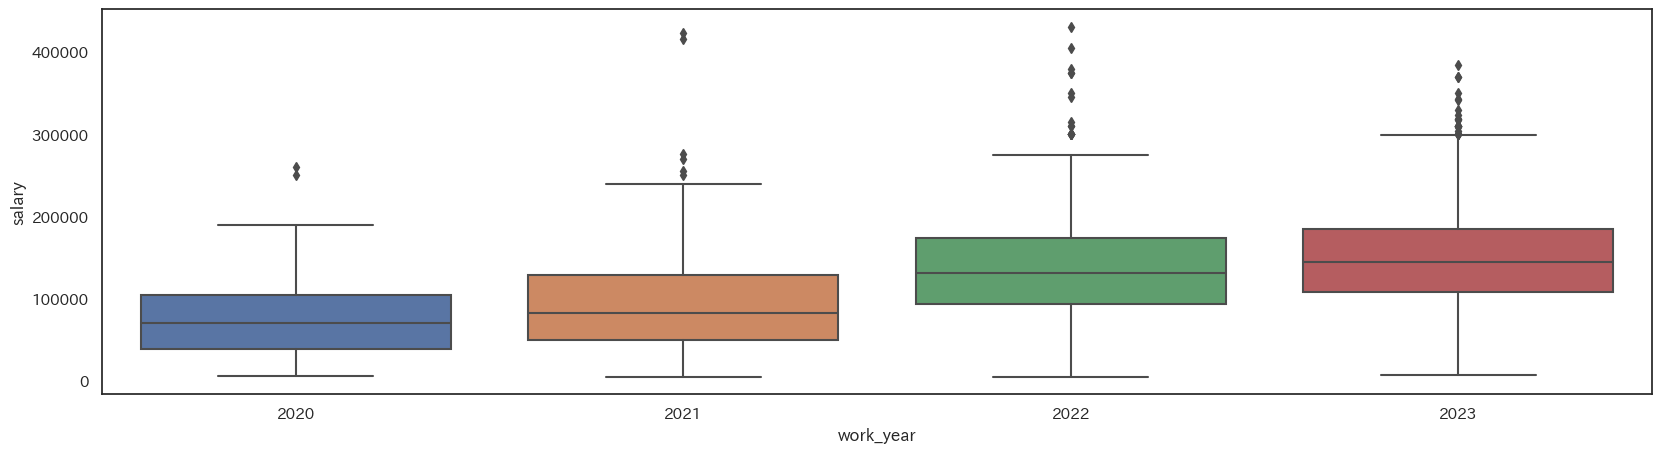

In [157]:
#work_year
fig = plt.subplots(figsize=(20,5))
sns.boxplot(x="work_year", y="salary", data=df_train_master)
df_train_master.groupby("work_year").describe()["salary"].sort_values("mean", ascending=True).T

#work_yearが最近になればなるほど年収が高くなる傾向がある

experience_level,EN,MI,SE,EX
count,242.000000,647.000000,2028.000000,87.000000
mean,79764.516529,104366.380216,152924.805227,193594.275862
std,53953.408273,53455.353149,56736.529065,69922.063226
min,5409.000000,5132.000000,8000.000000,15000.000000
25%,40000.000000,67660.000000,115000.000000,145000.000000
50%,70000.000000,100000.000000,147100.000000,200000.000000
75%,120000.000000,135000.000000,185900.000000,239000.000000
max,300000.000000,430967.000000,405000.000000,416000.000000


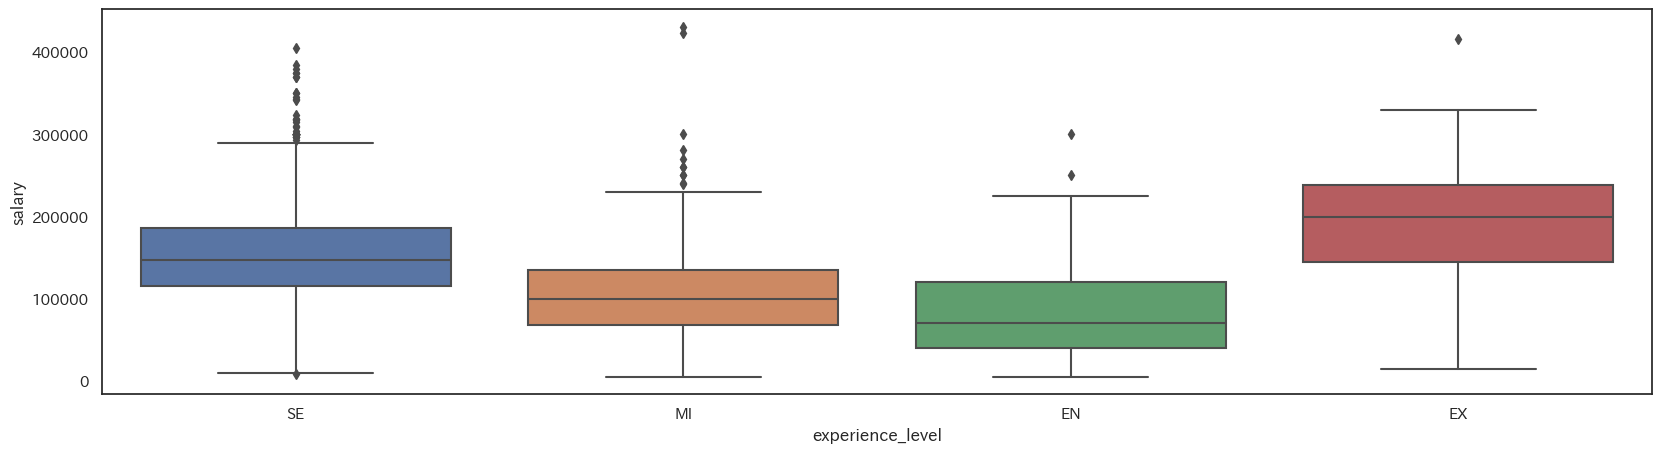

In [158]:
#experience_level
fig = plt.subplots(figsize=(20,5))
sns.boxplot(x="experience_level", y="salary", data=df_train_master)
df_train_master.groupby("experience_level").describe()["salary"].sort_values("mean", ascending=True).T

#EX=executive_level > SE=senior_level > MI=mid_level > EN=entry_level
#experience_levelによって年功序列式に年収の差がある様子

In [159]:
#employment_typeの欠損調査
display(df_train_master.query('employment_type != employment_type'))
df_train_master.query('employment_type != employment_type')["salary"].mean()

#明らかにおかしなところはないが、年収は低めな気がする(全て平均値以下)

,index,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary
174,3537,2021,MI,NaN,3D Computer Vision Researcher,IN,50.0,IN,M,5409
619,3481,2022,EN,NaN,Data Scientist,DZ,50.0,DZ,M,100000
677,971,2022,EN,NaN,Data Analyst,US,100.0,US,S,34320
794,3710,2020,EN,NaN,Data Scientist,IT,50.0,IT,S,21669
1015,3735,2021,EN,NaN,AI Scientist,BR,100.0,US,S,12000
1420,3496,2021,EN,NaN,Data Analyst,ES,50.0,ES,M,10354
1465,3576,2020,EN,NaN,ML Engineer,DE,100.0,DE,S,15966
1681,2501,2022,EN,NaN,Data Analyst,CN,50.0,US,S,125404
1836,1165,2023,EN,NaN,Data Analyst,PL,100.0,IN,L,17779
1972,2378,2022,EN,NaN,BI Analyst,MX,100.0,US,L,12000


39741.75

employment_type,NULL,FL,CT,FT
count,12.000000,6.000000,10.000000,2976.000000
mean,39741.750000,61259.166667,113446.900000,138381.499664
std,44374.603152,34068.005580,130176.746842,61980.010725
min,5409.000000,12000.000000,7500.000000,5132.000000
25%,12000.000000,46666.250000,30117.250000,95936.500000
50%,16872.500000,55000.000000,75000.000000,135000.000000
75%,50740.000000,90000.000000,103750.000000,176025.000000
max,125404.000000,100000.000000,416000.000000,430967.000000


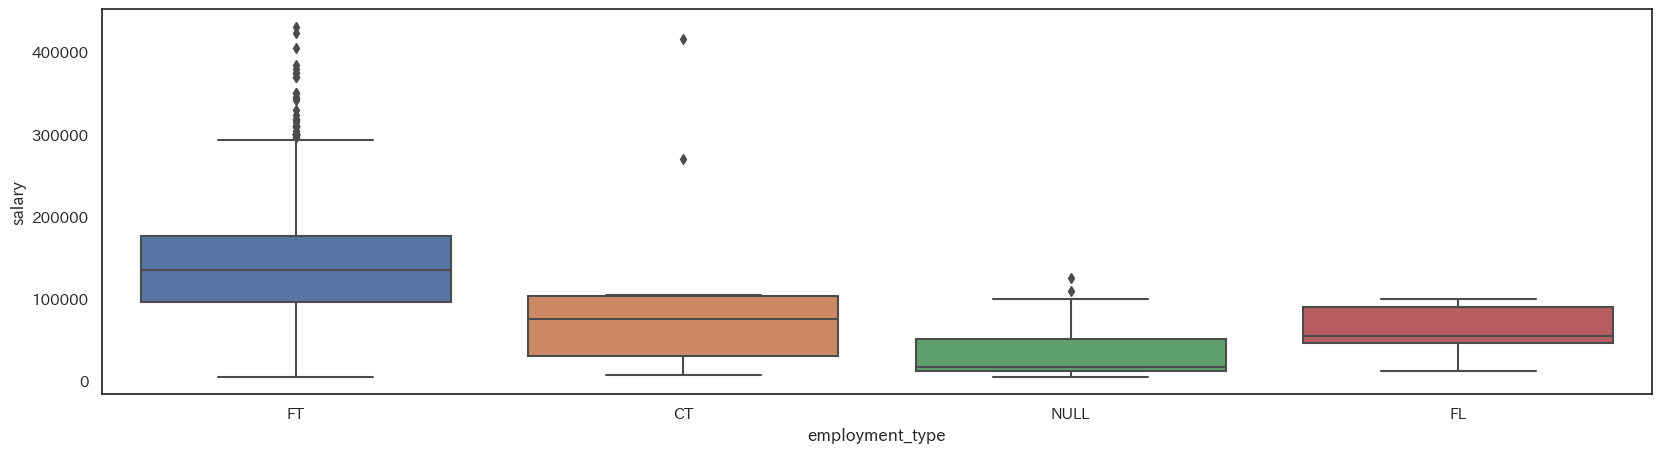

In [160]:
##employment_type
df_graph = df_train_master.copy()
df_graph["employment_type"] = df_graph["employment_type"].apply(lambda x:"NULL" if x != x else x)
fig = plt.subplots(figsize=(20,5))
sns.boxplot(x="employment_type", y="salary", data=df_graph)
df_graph.groupby("employment_type").describe()["salary"].sort_values("mean", ascending=True).T

#FT=full time, FL=free lancer, CT=contract(契約)
#欠損の正体は不明だが、salaryが低いため、欠損は単独のカテゴリーとして扱う
#one-hot encodingがよさそう(一番数が多いFTがbase)

job_title,Data Engineer,Data Scientist,Data Analyst,Machine Learning Engineer,Analytics Engineer,Data Architect,Research Scientist,Applied Scientist,Data Science Manager,ML Engineer,Research Engineer,Machine Learning Scientist,Data Manager,Data Science Consultant,Data Analytics Manager,BI Data Analyst,Computer Vision Engineer,BI Developer,Business Data Analyst,AI Scientist,Data Specialist,Applied Machine Learning Scientist,Applied Data Scientist,Machine Learning Infrastructure Engineer,Machine Learning Software Engineer,ETL Developer,Head of Data,BI Analyst,Director of Data Science,Data Quality Analyst,Data Operations Engineer,AI Developer,Lead Data Scientist,Data Science Lead,Deep Learning Engineer,Big Data Engineer,Principal Data Scientist,Head of Data Science,NLP Engineer,Machine Learning Developer,Data Analytics Engineer,Data Science Engineer,Lead Data Engineer,Product Data Analyst,Machine Learning Research Engineer,3D Computer Vision Researcher,Cloud Database Engineer,Data Infrastructure Engineer,Computer Vision Software Engineer,Cloud Data Engineer,Business Intelligence Engineer,Data Operations Analyst,Lead Machine Learning Engineer,Autonomous Vehicle Technician,Principal Data Engineer,Principal Data Analyst,Marketing Data Analyst,Data Analytics Lead,Machine Learning Researcher,Applied Machine Learning Engineer,Machine Learning Manager,AI Programmer,Data Analytics Consultant,MLOps Engineer,Data Scientist Lead,Data Analytics Specialist,ETL Engineer,Lead Data Analyst,Data Strategist,Financial Data Analyst,Staff Data Analyst,Software Data Engineer,Deep Learning Researcher,Product Data Scientist,Data Modeler,Principal Machine Learning Engineer,Azure Data Engineer,Data Management Specialist,Principal Data Architect,Power BI Developer,Data DevOps Engineer,BI Data Engineer,Marketing Data Engineer,Finance Data Analyst,Manager Data Management,Big Data Architect,Data Lead,Head of Machine Learning,Insight Analyst,Data Science Tech Lead,Staff Data Scientist
count,844.000000,678.000000,481.000000,233.000000,80.000000,77.000000,66.000000,48.000000,41.000000,29.000000,28.000000,21.000000,20.000000,19.000000,18.00000,15.000000,13.000000,12.000000,12.000000,12.000000,11.000000,11.000000,10.00000,9.000000,9.000000,9.000000,9.000000,8.000000,7.000000,7.000000,7.000000,7.000000,6.000000,6.00000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,5.00000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.00000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,143400.830569,140902.915929,108732.411642,156727.090129,154661.700000,155901.506494,160561.318182,190577.916667,195415.073171,164793.758621,160025.035714,162139.142857,113622.300000,85398.210526,143170.00000,60440.133333,162394.923077,127333.333333,57237.333333,100297.750000,120909.090909,116628.272727,113726.30000,152683.333333,183577.777778,118281.777778,178175.000000,101125.000000,162066.428571,85311.428571,113550.000000,164662.571429,114516.833333,169619.00000,109241.00000,64654.000000,202851.333333,142225.000000,132416.166667,80271.333333,78839.40000,93482.000000,148790.000000,35621.500000,42819.250000,21352.250000,146250.000000,169250.00000,92350.00000,87300.666667,189100.000000,93750.000000,82927.666667,26277.500000,192500.000000,122500.000000,144327.000000,211254.500000,102618.000000,99875.50000,133552.000000,55000.000000,81500.000000,134000.0,136153.000000,95000.000000,71394.500000,128500.000000,81000.000000,102500.000000,15000.0,75020.0,123405.0,8000.0,90700.0,190000.0,100000.0,68293.0,38154.0,5409.0,53654.0,60000.0,66970.0,61896.0,125000.0,99703.0,225000.0,76309.0,42533.0,375000.0,105000.0
std,57447.474115,61345.136298,46623.295022,62447.709600,55636.425242,49134.913979,65231.420657,50994.565718,63746.201600,79108.868859,52811.940602,62677.7733

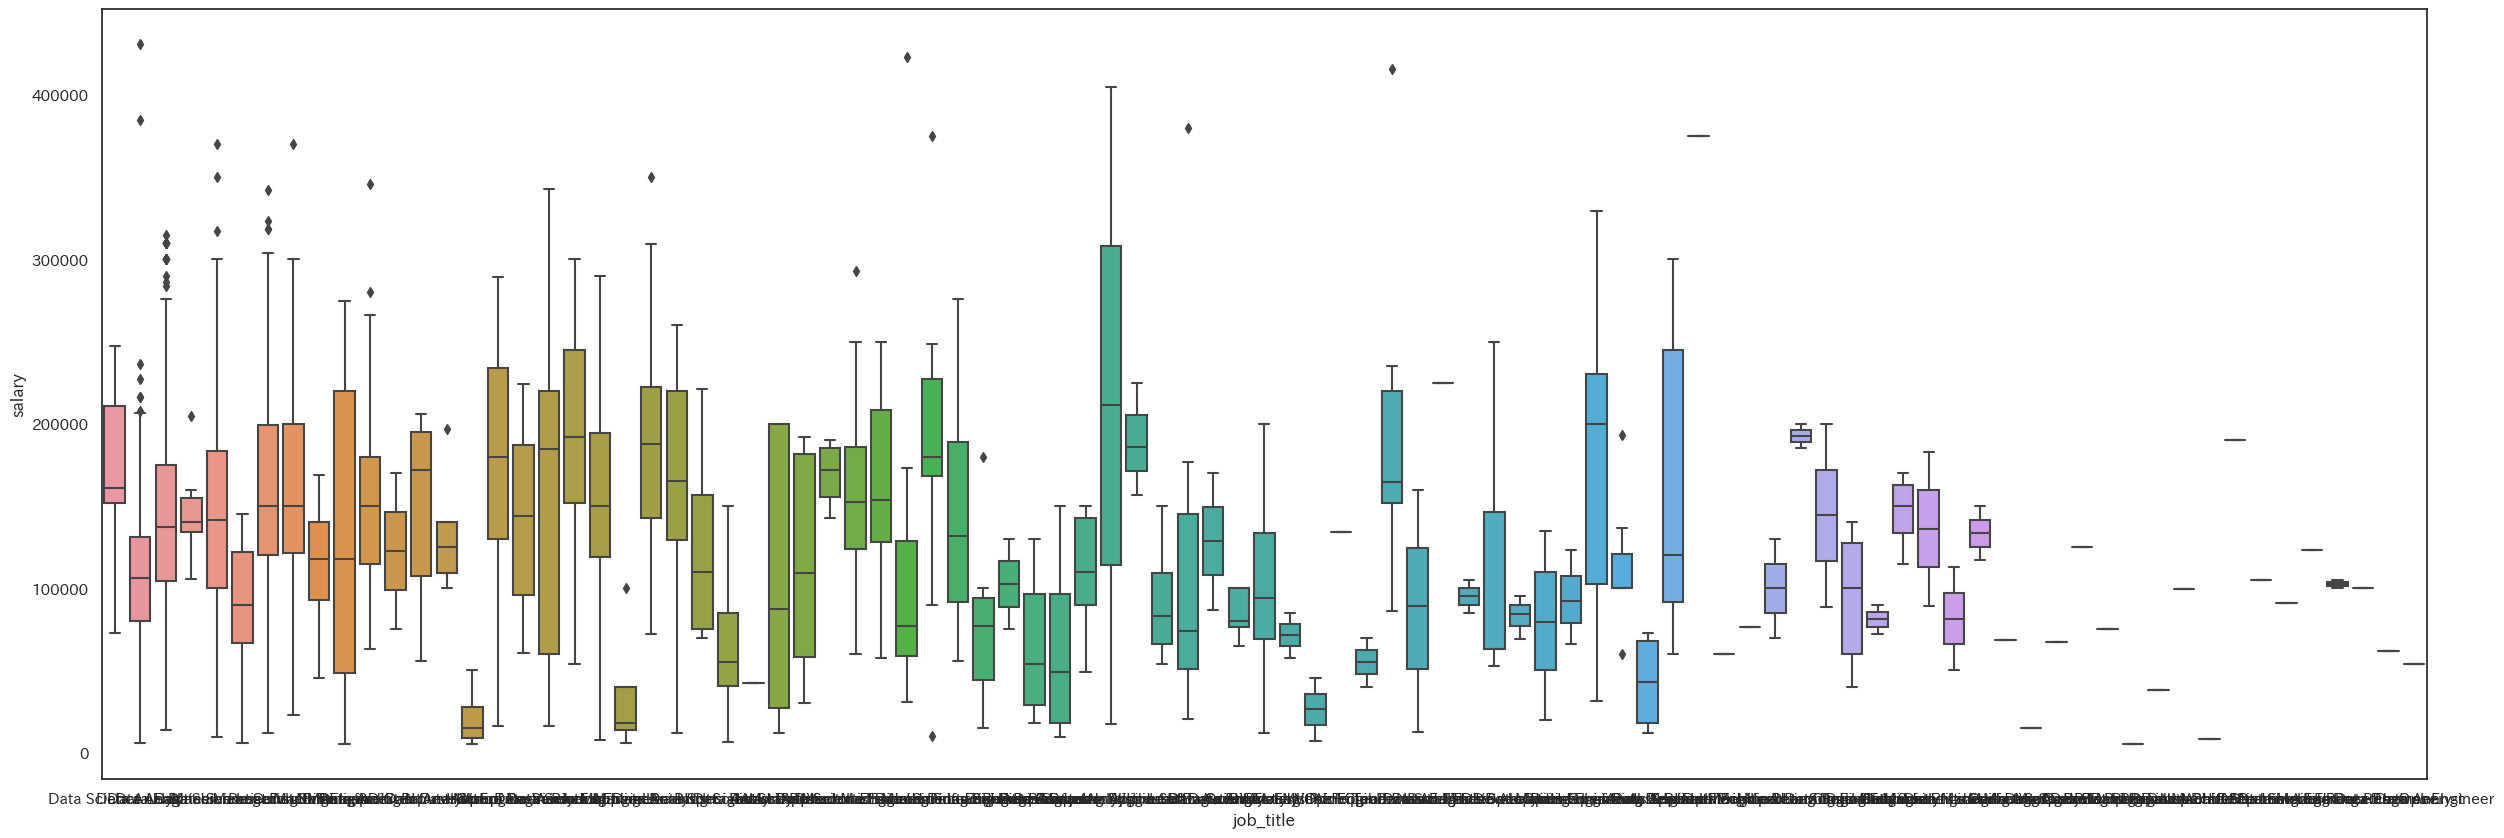

In [161]:
#job_title
fig = plt.subplots(figsize=(30,10))
sns.boxplot(x="job_title", y="salary", data=df_train_master)
df_train_master.groupby("job_title").describe()["salary"].sort_values("count", ascending=False).T

#カテゴリー数が多いためone hot encodingでは特徴量が増えすぎてしまう
#target encodingを検討(job_titleごとに平均salaryを算出し、その値をカテゴリー名の代わりに使用)

employee_residence,US,GB,CA,ES,IN,DE,FR,BR,GR,PT,NL,AU,IT,JP,MX,PK,PR,NG,IE,PL,BE,CO,TR,RU,SG,AT,LV,AR,RO,UA,TH,HR,HU,BO,KE,AE,VN,HK,FI,CH,CF,GH,AS,TN,BG,SK,CZ,SI,BA,SE,CL,RS,CN,CR,CY,IQ,DO,IR,DZ,EE,MY,MT,MD,MA,LU,LT,KW,HN,JE,AM,PH
count,2409.000000,134.000000,66.000000,63.000000,58.000000,37.000000,33.000000,15.000000,15.000000,13.000000,12.000000,9.000000,7.000000,6.000000,6.000000,6.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,2.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,152895.408883,88907.291045,136475.833333,57578.666667,38203.551724,89689.621622,62316.484848,50265.466667,55618.533333,46792.000000,79494.416667,72107.777778,55218.571429,107900.000000,96333.333333,24457.000000,166000.000000,75000.000000,103709.000000,31057.250000,68351.500000,64961.000000,20796.750000,105750.000000,87585.750000,73133.000000,57946.500000,42500.0,52164.000000,60466.666667,23064.333333,75967.666667,29892.666667,52500.00000,44636.00000,92500.000000,44200.000000,65542.00000,69030.000000,120747.500000,48609.000000,18500.000000,32777.500000,30469.0,80000.0,12608.0,5132.0,102839.0,120000.0,130000.0,40038.0,25532.0,125404.0,20000.0,63312.0,100000.0,110000.0,100000.0,100000.0,31520.0,200000.0,28369.0,18000.0,10000.0,59102.0,110446.0,50000.0,20000.0,100000.0,50000.0,50000.0
std,54755.958299,47057.258077,62740.031147,38956.354061,49750.885461,52548.710645,21738.156764,41135.564746,23540.218020,18623.558982,26943.319558,34430.299638,46342.958454,88139.212887,99508.123621,18760.690126,32672.618505,78581.168228,40029.956401,11054.145719,20192.598537,43785.211552,7889.787803,84255.069086,22922.992858,20401.349383,22303.618249,21000.0,25446.737925,47301.726536,7370.766333,31986.011198,10576.261170,38971.14317,50012.24842,38890.872965,8202.438662,678.82251,8471.139239,488.610786,8592.761605,16263.455967,18070.113793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,24000.000000,30000.000000,10000.000000,10354.000000,5409.000000,15966.000000,6359.000000,6270.000000,12877.000000,21013.000000,45391.000000,40000.000000,21669.000000,40000.000000,12000.000000,8000.000000,135000.000000,10000.000000,68293.000000,17779.000000,50000.000000,21844.000000,10000.000000,48000.000000,66970.000000,50000.000000,38631.000000,12000.0,26005.000000,13400.000000,15000.000000,45618.000000,17684.000000,7500.00000,9272.00000,65000.000000,38400.000000,65062.00000,63040.000000,120402.000000,42533.000000,7000.000000,20000.000000,30469.0,80000.0,12608.0,5132.0,102839.0,120000.0,130000.0,40038.0,25532.0,125404.0,20000.0,63312.0,100000.0,110000.0,100000.0,100000.0,31520.0,200000.0,28369.0,18000.0,10000.0,59102.0,110446.0,50000.0,20000.0,100000.0,50000.0,50000.0
25%,115000.000000,61566.000000,90175.000000,37824.000000,13617.000000,60938.000000,52533.000000,16211.500000,41107.500000,31520.000000,58574.500000,45050.000000,28582.500000,47194.500000,31500.000000,12000.000000,135000.000000,15000.000000,80481.000000,25801.750000,51506.000000,41461.000000,17628.250000,57000.000000,73007.500000,58991.750000,38631.000000,39000.0,39829.500000,36700.000000,19870.000000,59266.000000,26709.500000,41250.00000,26954.00000,78750.000000,41300.000000,65302.00000,66035.000000,120574.750000,45571.000000,12750.000000,26388.750000,30469.0,80000.0,12608.0,5132.0,102839.0,120000.0,130000.0,40038.0,25532.0,125404.0,20000.0,63312.0,100000.0,110000.0,100000.0,100000.0,31520.0,200000.0,28369.0,18000.0,10000.0,59102.0,110446.0,50000.0,20000.0,100000.0,50000.0,50000.0
50%,145885.000000,80036.000000,126453.500000,47280.000000,19492.000000,76833.000000,62649.000000,48000.000000,52533.000000,42026.000000,78799.500000,68318.000000,34672.000000,68855.500000,48000.000000,16000.000000,160000.00000

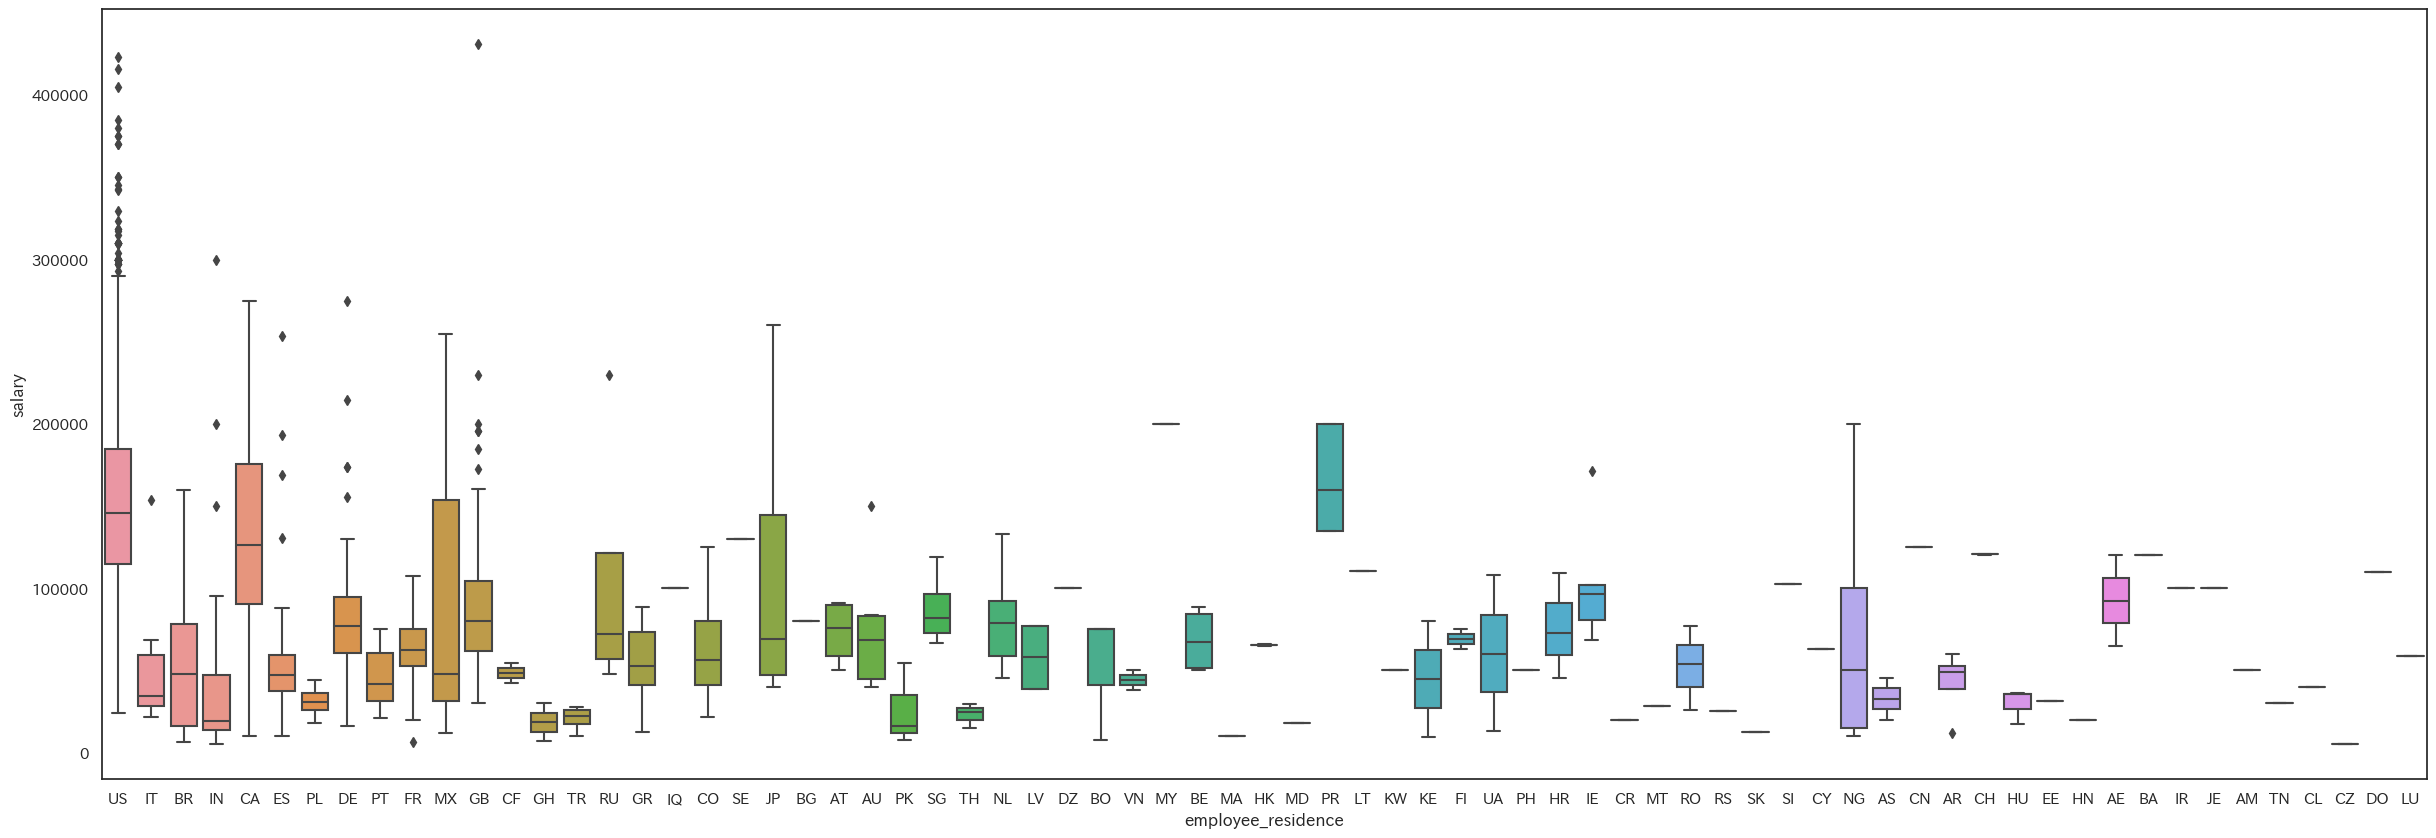

In [162]:
#employee_residence(社員の居住地)
fig = plt.subplots(figsize=(30,10))
sns.boxplot(x="employee_residence", y="salary", data=df_train_master)
df_train_master.groupby("employee_residence").describe()["salary"].sort_values("count", ascending=False).T

#employee_residenceよりもcompany_locationの方が年収に影響がありそうな気がする
#そのまま使ってもいいが、campany_locationとemployee_residenceが同じかどうか新しい特徴量を作ってみる

residence_same_location,0,1
count,76.000000,2928.000000
mean,69276.197368,139527.758538
std,49144.973895,61911.350586
min,6359.000000,5132.000000
25%,37864.750000,100000.000000
50%,58000.000000,136000.000000
75%,84289.750000,179042.500000
max,225000.000000,430967.000000


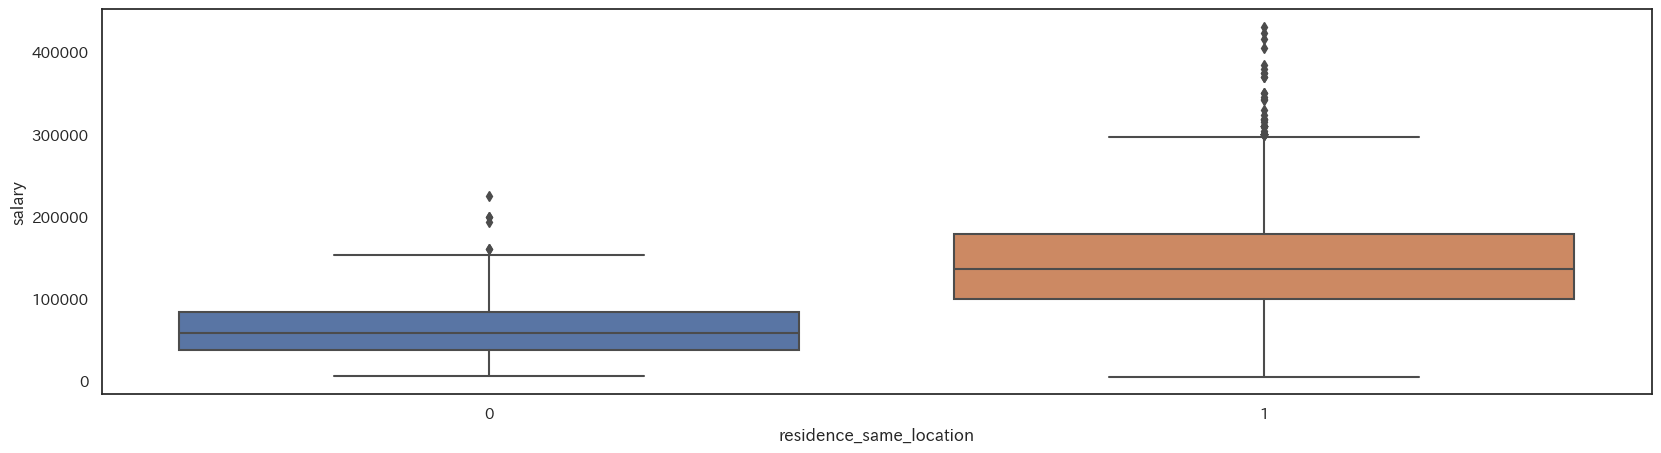

In [163]:
#employee_residence=campany_location
df_graph = df_train_master.copy()
df_graph["residence_same_location"] = np.where(df_graph["company_location"] == df_graph["employee_residence"], 1, 0)
fig = plt.subplots(figsize=(20,5))
sns.boxplot(x="residence_same_location", y="salary", data=df_graph)
df_graph.groupby("residence_same_location").describe()["salary"].sort_values("mean", ascending=True).T

#差があるので使えそう
#employee_residenceはこの特徴量に変更して使用

In [164]:
#remote_ratioの欠損調査
df_train_master.query('remote_ratio != remote_ratio')

#明らかにおかしなところはなし
#最小値が50であることから、リモートワークがないところは欠損になっているのでは？？

,index,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size,salary
0,1282,2023,SE,FT,Data Science Lead,US,NaN,US,M,225900
1,220,2023,SE,FT,Data Analyst,US,NaN,US,M,140000
3,129,2023,MI,FT,Data Analytics Manager,US,NaN,US,M,155000
5,698,2023,SE,FT,Data Scientist,US,NaN,US,M,160000
6,178,2023,SE,FT,Data Engineer,US,NaN,US,M,155000
...,...,...,...,...,...,...,...,...,...,...
2993,3339,2022,MI,FT,Data Analyst,CA,NaN,CA,M,75000
2996,2249,2022,SE,FT,Data Scientist,ES,NaN,ES,M,47280
2998,319,2023,SE,FT,Data Scientist,US,NaN,US,M,140000
2999,203,2023,EX,FT,Data Engineer,US,NaN,US,M,220000


remote_ratio,50.0,100.0,0.0
count,147.000000,1339.000000,1518.000000
mean,79547.557823,136251.811053,144708.565217
std,64519.681804,63443.748856,58537.048270
min,5409.000000,5132.000000,6072.000000
25%,38321.500000,90000.000000,105775.000000
50%,63312.000000,135000.000000,140000.000000
75%,102500.000000,180000.000000,179342.500000
max,423000.000000,416000.000000,430967.000000


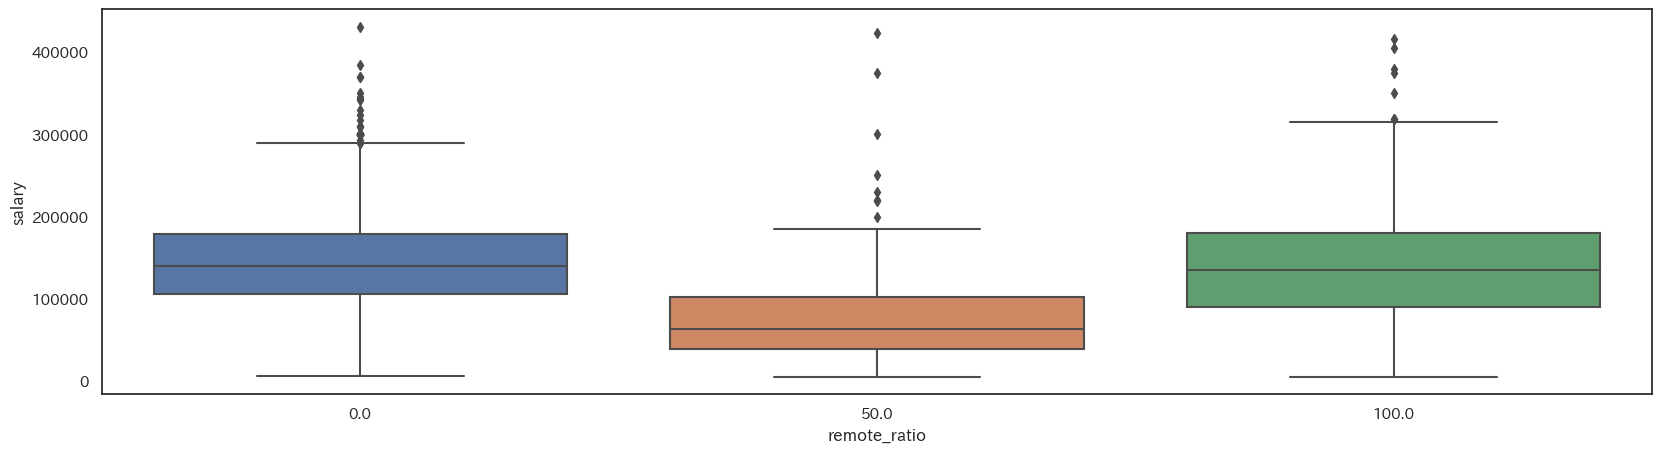

In [165]:
#remote_ratio
df_graph = df_train_master.copy()
df_graph["remote_ratio"] = df_graph["remote_ratio"].apply(lambda x:0 if x != x else x)
fig = plt.subplots(figsize=(20,5))
sns.boxplot(x="remote_ratio", y="salary", data=df_graph)
df_graph.groupby("remote_ratio").describe()["salary"].sort_values("mean", ascending=True).T

#リモートワーク率が50%だと給料が低い傾向はありそう
#0%と100%はほぼ変わらないため、50だけ特徴量と使用する

company_location,US,GB,CA,ES,IN,DE,FR,GR,BR,PT,NL,AU,MX,JP,IE,AT,SG,PR,LV,IT,TR,PL,CO,NG,PK,BE,TH,AS,UA,HR,FI,RU,LU,KE,RO,AE,CZ,GH,AR,CF,CH,EE,HU,LT,HK,AM,IR,BA,SK,SI,BO,SE,BS,AL,HN,CL,CN,CR,PH,IQ,DK,MY,DZ,MT,MD,MA,IL
count,2438.000000,138.000000,68.000000,61.000000,48.000000,42.000000,29.000000,13.00000,13.000000,11.000000,10.000000,9.000000,6.000000,5.000000,5.000000,5.00000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,151938.462264,88533.108696,135960.250000,53387.885246,30432.125000,84477.452381,67877.448276,52092.00000,44767.846154,47343.272727,81527.900000,72294.666667,104333.333333,121480.000000,103709.000000,70799.80000,51358.600000,167500.000000,57946.500000,41297.750000,20796.750000,65029.250000,64961.000000,90000.000000,20000.000000,74468.666667,23064.333333,29351.000000,60466.666667,75967.666667,68792.666667,157500.000000,60914.000000,44636.00000,56827.000000,92500.000000,17800.500000,18500.000000,31000.000000,48609.000000,120747.500000,47416.000000,26709.500000,110446.0,65062.0,50000.0,100000.0,120000.0,12608.0,102839.0,7500.0,130000.0,45555.0,10000.0,20000.0,40038.0,100000.0,50000.0,50000.0,100000.0,88654.0,40000.0,100000.0,28369.0,18000.0,10000.0,119059.0
std,55383.876643,46451.818331,64034.852042,33960.623868,45227.446337,51670.748215,27065.889521,22987.11219,28564.345587,19597.650941,28374.436912,34411.717172,93094.933625,91255.290589,40029.956401,18422.28009,36291.995837,37527.767497,22303.618249,22382.598231,7889.787803,59461.567837,43785.211552,82056.890834,14236.104336,19674.683869,7370.766333,17909.036909,47301.726536,31986.011198,6004.088718,102530.483272,2562.554975,50012.24842,4487.299633,38890.872965,17915.964515,16263.455967,26870.057685,8592.761605,488.610786,22480.338787,12763.984507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,12000.000000,30000.000000,15000.000000,10354.000000,5409.000000,15966.000000,20000.000000,12877.00000,6270.000000,21013.000000,45391.000000,40000.000000,30000.000000,41689.000000,68293.000000,50000.00000,8000.000000,135000.000000,38631.000000,21669.000000,10000.000000,28476.000000,21844.000000,10000.000000,8000.000000,52008.000000,15000.000000,18053.000000,13400.000000,45618.000000,63040.000000,85000.000000,59102.000000,9272.00000,53654.000000,65000.000000,5132.000000,7000.000000,12000.000000,42533.000000,120402.000000,31520.000000,17684.000000,110446.0,65062.0,50000.0,100000.0,120000.0,12608.0,102839.0,7500.0,130000.0,45555.0,10000.0,20000.0,40038.0,100000.0,50000.0,50000.0,100000.0,88654.0,40000.0,100000.0,28369.0,18000.0,10000.0,119059.0
25%,113900.000000,61566.000000,85007.000000,37824.000000,12857.750000,59711.750000,52533.000000,40189.00000,19522.000000,33358.500000,59888.000000,45050.000000,42000.000000,63711.000000,80481.000000,61467.00000,17509.000000,135000.000000,38631.000000,23541.000000,17628.250000,32325.750000,41461.000000,40000.000000,11000.000000,67376.000000,19870.000000,19026.500000,36700.000000,59266.000000,65679.000000,121250.000000,60008.000000,26954.00000,55240.500000,78750.000000,11466.250000,12750.000000,21500.000000,45571.000000,120574.750000,39468.000000,22196.750000,110446.0,65062.0,50000.0,100000.0,120000.0,12608.0,102839.0,7500.0,130000.0,45555.0,10000.0,20000.0,40038.0,100000.0,50000.0,50000.0,100000.0,88654.0,40000.0,100000.0,28369.0,18000.0,10000.0,119059.0
50%,145000.000000,80036.000000,126453.500000,47280.000000,17400.500000,75189.500000,62649.000000,52533.00000,48000.000000,42026.000000,78799.500000,70000.000000,60000.000000,74000.000000,96578.000000,61989.00000,66970.000000,167500.000000,57946.500000,37614.500000,22585.500000,38987.000000,56500.000000,75000.000000,16000.000000,82744.000000,24

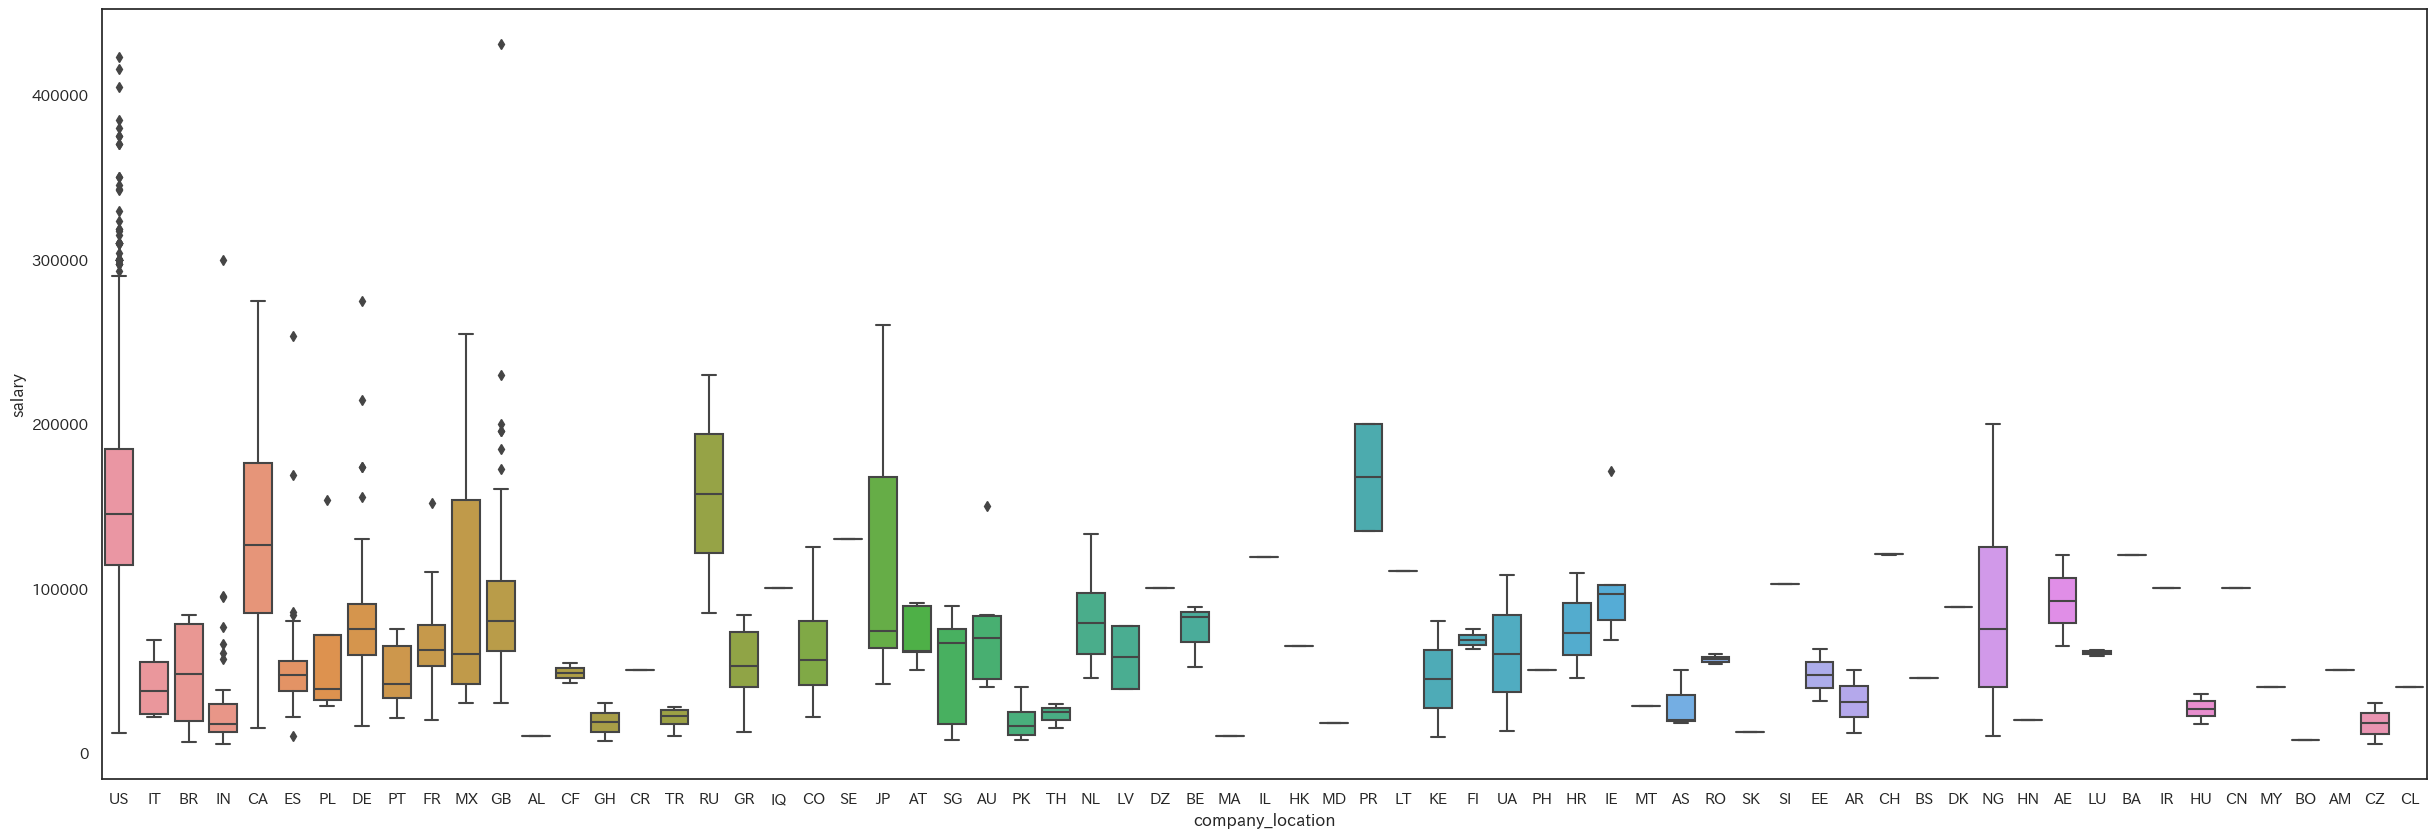

In [166]:
#company_location
fig = plt.subplots(figsize=(30,10))
sns.boxplot(x="company_location", y="salary", data=df_train_master)
df_train_master.groupby("company_location").describe()["salary"].sort_values("count", ascending=False).T

#これもカテゴリー数が多いため、target encodingを検討

company_size,M,L,S
count,2526.000000,358.000000,120.000000
mean,143400.703484,117745.692737,78492.775000
std,58653.152600,73934.675714,63690.041134
min,5132.000000,5409.000000,5723.000000
25%,104000.000000,61919.250000,40266.750000
50%,140000.000000,108000.000000,62146.000000
75%,180000.000000,159075.000000,100790.000000
max,430967.000000,423000.000000,416000.000000


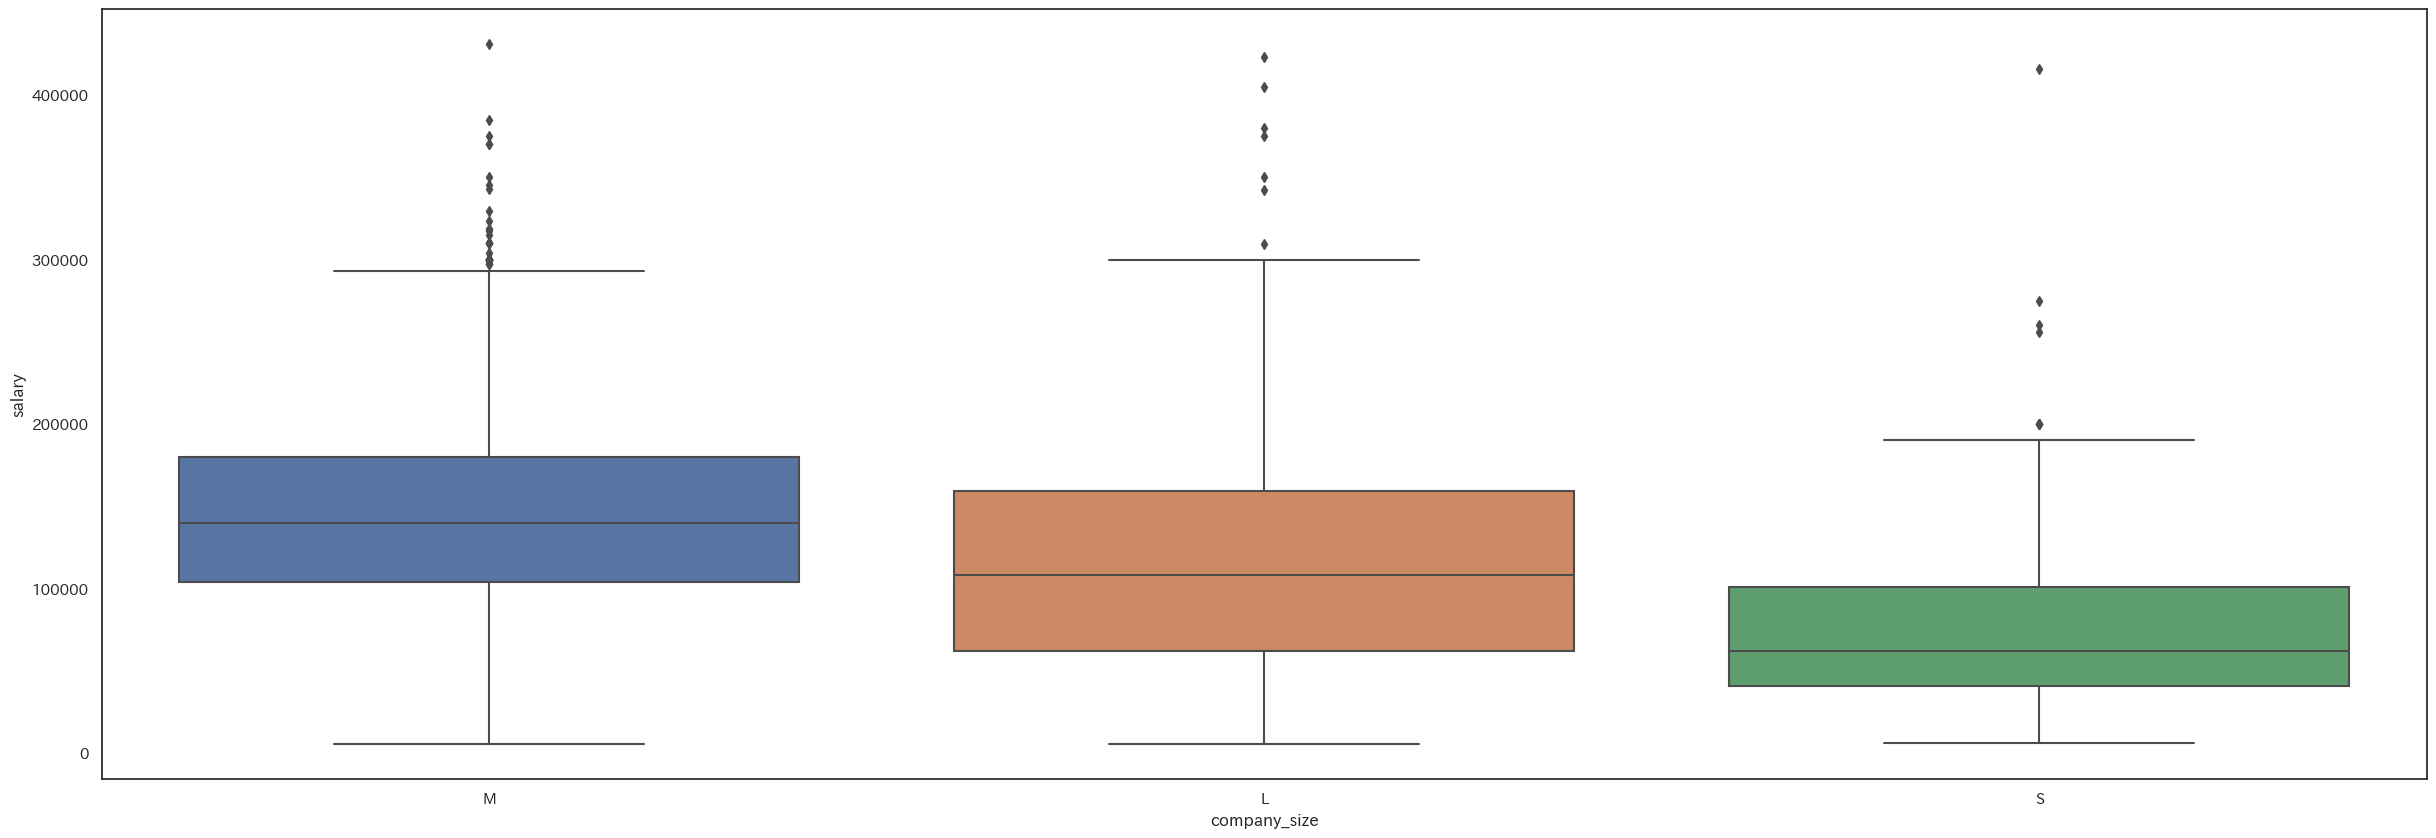

In [167]:
#company_size
fig = plt.subplots(figsize=(30,10))
sns.boxplot(x="company_size", y="salary", data=df_train_master)
df_train_master.groupby("company_size").describe()["salary"].sort_values("mean", ascending=False).T

#M > L > Sの順に給料が高い
#LよりMの方が高い理由は不明だが、順序尺度にすると危険
#one-hot encodingを検討(一番数が多いMをbase)

## 機械学習の前処理

In [168]:
#変数の再確認
df_train_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               3004 non-null   int64  
 1   work_year           3004 non-null   int64  
 2   experience_level    3004 non-null   object 
 3   employment_type     2992 non-null   object 
 4   job_title           3004 non-null   object 
 5   employee_residence  3004 non-null   object 
 6   remote_ratio        1486 non-null   float64
 7   company_location    3004 non-null   object 
 8   company_size        3004 non-null   object 
 9   salary              3004 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.8+ KB


In [169]:
#機械学習用のデータフレームを作成
df_train = df_train_master.copy()
df_submit = df_submit_master.copy()

#indexは削除
df_train = df_train.drop("index", axis=1)

#work_year 処理なし

#experience_level 順序尺度に変換
df_train["experience_level"] = df_train["experience_level"].map({"EN": 1,  "MI": 2, "SE": 3, "EX": 4})
df_submit["experience_level"] = df_submit["experience_level"].map({"EN": 1,  "MI": 2, "SE": 3, "EX": 4})

#employment_type 欠損を"NULL"に変換し、one-hot encoding(FTがbase)
df_train["employment_type_CT"] = df_train["employment_type"].apply(lambda x:1 if x == "CT" else 0)
df_train["employment_type_FL"] = df_train["employment_type"].apply(lambda x:1 if x == "FL" else 0)
df_train["employment_type_NULL"] = df_train["employment_type"].apply(lambda x:1 if x != x else 0)
df_train = df_train.drop("employment_type", axis=1)
df_submit["employment_type_CT"] = df_submit["employment_type"].apply(lambda x:1 if x == "CT" else 0)
df_submit["employment_type_FL"] = df_submit["employment_type"].apply(lambda x:1 if x == "FL" else 0)
df_submit["employment_type_NULL"] = df_submit["employment_type"].apply(lambda x:1 if x != x else 0)
df_submit = df_submit.drop("employment_type", axis=1)

#job_title 後でtarget encoding

#employee_residence company_locationと同じかどうか判定する特徴量に変更
df_train["residence_same_location"] = np.where(df_train["company_location"] == df_train["employee_residence"], 1, 0)
df_train = df_train.drop("employee_residence", axis=1)
df_submit["residence_same_location"] = np.where(df_submit["company_location"] == df_submit["employee_residence"], 1, 0)
df_submit = df_submit.drop("employee_residence", axis=1)

#remote_ratio 50%のみ特徴量として使用
df_train["remote_ratio"] = df_train["remote_ratio"].apply(lambda x:1 if x == 50 else 0)
df_submit["remote_ratio"] = df_submit["remote_ratio"].apply(lambda x:1 if x == 50 else 0)

#company_location 後でtarget encoding

#company_size one-hot encoding(Mをbase)
df_train["company_size_S"] = df_train["company_size"].apply(lambda x:1 if x == "S" else 0)
df_train["company_size_L"] = df_train["company_size"].apply(lambda x:1 if x == "L" else 0)
df_train = df_train.drop("company_size", axis=1)
df_submit["company_size_S"] = df_submit["company_size"].apply(lambda x:1 if x == "S" else 0)
df_submit["company_size_L"] = df_submit["company_size"].apply(lambda x:1 if x == "L" else 0)
df_submit = df_submit.drop("company_size", axis=1)

#データの確認
display(df_train.info())
display(df_train.describe())
display(df_submit.info())
display(df_submit.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3004 entries, 0 to 3003
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   work_year                3004 non-null   int64 
 1   experience_level         3004 non-null   int64 
 2   job_title                3004 non-null   object
 3   remote_ratio             3004 non-null   int64 
 4   company_location         3004 non-null   object
 5   salary                   3004 non-null   int64 
 6   employment_type_CT       3004 non-null   int64 
 7   employment_type_FL       3004 non-null   int64 
 8   employment_type_NULL     3004 non-null   int64 
 9   residence_same_location  3004 non-null   int64 
 10  company_size_S           3004 non-null   int64 
 11  company_size_L           3004 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 281.8+ KB


None

,work_year,experience_level,remote_ratio,salary,employment_type_CT,employment_type_FL,employment_type_NULL,residence_same_location,company_size_S,company_size_L
count,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.00000,3004.000000,3004.000000
mean,2022.376831,2.652463,0.048935,137750.422104,0.003329,0.001997,0.003995,0.97470,0.039947,0.119174
std,0.685570,0.667791,0.215768,62594.504028,0.057610,0.044654,0.063088,0.15706,0.195867,0.324048
min,2020.000000,1.000000,0.000000,5132.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2022.000000,2.000000,0.000000,95000.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
50%,2022.000000,3.000000,0.000000,135000.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
75%,2023.000000,3.000000,0.000000,175152.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
max,2023.000000,4.000000,1.000000,430967.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   index                    751 non-null    int64 
 1   work_year                751 non-null    int64 
 2   experience_level         751 non-null    int64 
 3   job_title                751 non-null    object
 4   remote_ratio             751 non-null    int64 
 5   company_location         751 non-null    object
 6   employment_type_CT       751 non-null    int64 
 7   employment_type_FL       751 non-null    int64 
 8   employment_type_NULL     751 non-null    int64 
 9   residence_same_location  751 non-null    int64 
 10  company_size_S           751 non-null    int64 
 11  company_size_L           751 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 70.5+ KB


None

,index,work_year,experience_level,remote_ratio,employment_type_CT,employment_type_FL,employment_type_NULL,residence_same_location,company_size_S,company_size_L
count,751.000000,751.000000,751.000000,751.000000,751.0,751.000000,751.000000,751.000000,751.000000,751.000000
mean,1868.904128,2022.360852,2.617843,0.055925,0.0,0.005326,0.006658,0.973369,0.037284,0.127830
std,1097.436189,0.714804,0.718629,0.229931,0.0,0.072835,0.081377,0.161110,0.189582,0.334122
min,6.000000,2020.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,904.000000,2022.000000,2.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1893.000000,2022.000000,3.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2823.000000,2023.000000,3.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,3750.000000,2023.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
#説明変数と目的変数に分割
X = df_train.drop("salary", axis=1)
y = df_train["salary"]

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#以下target_encoding(groupby→merge)
#X_trainとy_trainを使って各カテゴリーの平均salaryを算出、~_scoreとしてmergeする
df_target = pd.merge(X_train, y_train, left_index=True, right_index=True)[["job_title", "company_location", "salary"]]
df_target_job_title = df_target.groupby("job_title", as_index=False).mean(numeric_only=True).rename(columns={"salary": "job_title_score"})
df_target_company_location = df_target.groupby("company_location", as_index=False).mean(numeric_only=True).rename(columns={"salary": "company_location_score"})
X_train = pd.merge(X_train, df_target_job_title, on="job_title", how="left")
X_train = pd.merge(X_train, df_target_company_location, on="company_location", how="left")
X_train = X_train.drop(["job_title", "company_location"], axis=1)
X_test = pd.merge(X_test, df_target_job_title, on="job_title", how="left")
X_test = pd.merge(X_test, df_target_company_location, on="company_location", how="left")
X_test = X_test.drop(["job_title", "company_location"], axis=1)

#trainデータにないカテゴリーは中央値で埋める
X_train["job_title_score"] = X_train["job_title_score"].fillna(X_train["job_title_score"].median())
X_train["company_location_score"] = X_train["company_location_score"].fillna(X_train["company_location_score"].median())
X_test["job_title_score"] = X_test["job_title_score"].fillna(X_test["job_title_score"].median())
X_test["company_location_score"] = X_test["company_location_score"].fillna(X_test["company_location_score"].median())

display(X_train.info())
display(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   work_year                2403 non-null   int64  
 1   experience_level         2403 non-null   int64  
 2   remote_ratio             2403 non-null   int64  
 3   employment_type_CT       2403 non-null   int64  
 4   employment_type_FL       2403 non-null   int64  
 5   employment_type_NULL     2403 non-null   int64  
 6   residence_same_location  2403 non-null   int64  
 7   company_size_S           2403 non-null   int64  
 8   company_size_L           2403 non-null   int64  
 9   job_title_score          2403 non-null   float64
 10  company_location_score   2403 non-null   float64
dtypes: float64(2), int64(9)
memory usage: 206.6 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   work_year                601 non-null    int64  
 1   experience_level         601 non-null    int64  
 2   remote_ratio             601 non-null    int64  
 3   employment_type_CT       601 non-null    int64  
 4   employment_type_FL       601 non-null    int64  
 5   employment_type_NULL     601 non-null    int64  
 6   residence_same_location  601 non-null    int64  
 7   company_size_S           601 non-null    int64  
 8   company_size_L           601 non-null    int64  
 9   job_title_score          601 non-null    float64
 10  company_location_score   601 non-null    float64
dtypes: float64(2), int64(9)
memory usage: 51.8 KB


None

<Axes: >

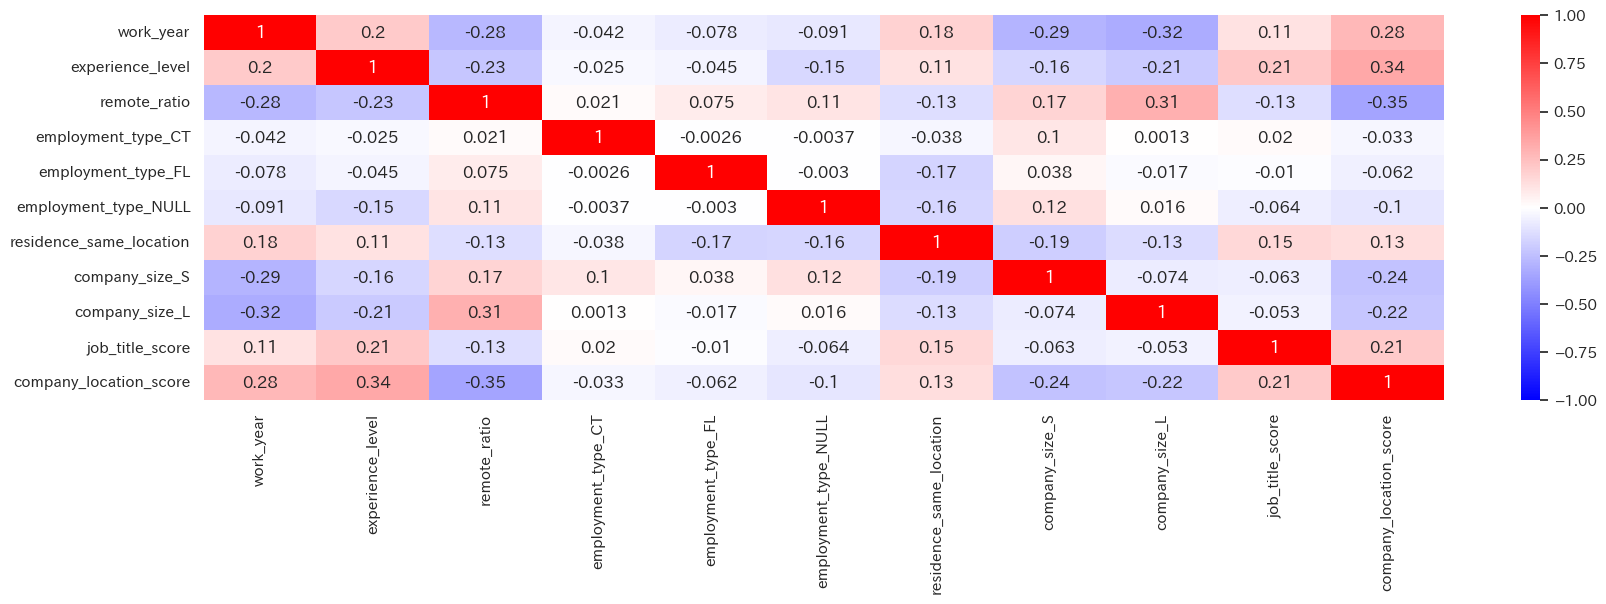

In [172]:
#相関行列を作成
fig = plt.subplots(figsize=(20,5))
sns.heatmap(X_train.corr(), cmap="bwr", annot=True, vmax=1, vmin=-1, center=0)
#多重共線性は問題なさそう

## モデル作成と評価

In [173]:
#重回帰(sklearn)
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#スコア算出
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("r2=", r2_score(y_true=y_test, y_pred=y_pred))
print("RMSE=", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
print("MAE=", mean_absolute_error(y_true=y_test, y_pred=y_pred))
pd.DataFrame(lr.coef_, index=X_train.columns)

r2= 0.317455942017824
RMSE= 49427.227100854245
MAE= 38485.63109698029


,0
work_year,5937.151763
experience_level,23949.590595
remote_ratio,6829.552292
employment_type_CT,4079.890242
employment_type_FL,-6989.255291
employment_type_NULL,-2449.941302
residence_same_location,16925.065246
company_size_S,-6987.339097
company_size_L,7203.817599
job_title_score,0.648419


In [174]:
#標準化偏回帰係数を確認

#標準化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std,columns=X_train.columns)
X_test_std = ss.transform(X_test)
X_test_std = pd.DataFrame(X_test_std,columns=X_test.columns)
lr2 = LinearRegression() 
lr2.fit(X_train_std, y_train)
y_pred = lr2.predict(X_test_std)

#標準化偏回帰係数を算出
pd.DataFrame(lr2.coef_, index=X_train_std.columns)

#campany_location, job_title, experience_levelが予測に寄与

,0
work_year,4099.932424
experience_level,15854.866742
remote_ratio,1457.858570
employment_type_CT,235.013311
employment_type_FL,-318.483344
employment_type_NULL,-157.715094
residence_same_location,2619.276764
company_size_S,-1354.671340
company_size_L,2322.042078
job_title_score,16602.800575


In [175]:
#ベースラインモデル 全体の平均値を代入して予測
y_pred = [np.mean(y_train)] * len(y_test)
print("RMSE=", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))

#重回帰モデルのスコアがベースラインモデルを上回っていることを確認

RMSE= 59966.55640206942


In [176]:
#決定木分析
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=1, max_depth=20) #max_depthを指定
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#スコア算出
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("r2=", r2_score(y_true=y_test, y_pred=y_pred))
print("RMSE=", np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred)))
print("MAE=", mean_absolute_error(y_true=y_test, y_pred=y_pred))
pd.DataFrame(clf.feature_importances_, index=X_train.columns)

#RMSEがより低い重回帰モデルを採用
#寄与している変数は回帰モデルと近しい

r2= 0.30985192505518
RMSE= 49701.79140512369
MAE= 37258.48590021948


,0
work_year,0.032166
experience_level,0.114839
remote_ratio,0.006464
employment_type_CT,0.012475
employment_type_FL,0.000529
employment_type_NULL,0.000719
residence_same_location,0.017311
company_size_S,0.014578
company_size_L,0.023281
job_title_score,0.287002


In [177]:
#誤差の多かったデータと誤差の少なかったデータで比較を行う
y_pred = lr.predict(X_test)
X_test["y_pred"] = y_pred
X_test["y_true"] = np.array(y_test)
X_test["error"] = X_test["y_pred"] - X_test["y_true"]
X_test["abs_error"] = abs(X_test["y_pred"] - X_test["y_true"])
display(X_test.sort_values("abs_error", ascending=False).head(10))
display(X_test.sort_values("abs_error", ascending=True).head(10))

#誤差の大きいものはsalaryを低く予想しがち(通常よりもsalaryが高くなる特徴量を追加すればスコア改善が望めるか)

,work_year,experience_level,remote_ratio,employment_type_CT,employment_type_FL,employment_type_NULL,residence_same_location,company_size_S,company_size_L,job_title_score,company_location_score,y_pred,y_true,error,abs_error
83,2022,3,0,0,0,0,1,0,1,82052.600000,153173.138232,125030.883306,380000,-254969.116694,254969.116694
372,2023,2,1,0,0,0,0,0,0,405000.000000,59821.000000,232708.799893,17509,215199.799893,215199.799893
177,2022,3,1,0,0,0,1,0,1,145371.634757,153173.138232,172917.704765,375000,-202082.295235,202082.295235
281,2022,3,0,0,0,0,1,1,0,87000.000000,53333.333333,43016.487295,200000,-156983.512705,156983.512705
310,2022,3,0,0,0,0,1,0,0,145371.634757,153173.138232,158884.334875,315000,-156115.665125,156115.665125
111,2020,3,0,0,0,0,1,1,0,169146.666667,86850.000000,108253.147540,260000,-151746.852460,151746.852460
261,2023,3,0,0,0,0,1,0,0,157636.807292,153173.138232,172774.458316,318300,-145525.541684,145525.541684
544,2023,4,0,0,0,0,1,0,0,143496.428571,153173.138232,187555.157795,329500,-141944.842205,141944.842205
439,2022,3,0,0,0,0,1,0,0,145371.634757,153173.138232,158884.334875,300000,-141115.665125,141115.665125
113,2020,4,0,0,0,0,0,0,0,145371.634757,132287.767857,139175.618402,15000,124175.618402,124175.618402


,work_year,experience_level,remote_ratio,employment_type_CT,employment_type_FL,employment_type_NULL,residence_same_location,company_size_S,company_size_L,job_title_score,company_location_score,y_pred,y_true,error,abs_error
253,2023,3,0,0,0,0,1,0,0,108853.469657,153173.138232,141142.412253,141290,-147.587747,147.587747
491,2022,3,0,0,0,0,1,0,0,141820.686239,153173.138232,156581.832165,156400,181.832165,181.832165
167,2022,3,0,0,0,0,1,0,0,141820.686239,153173.138232,156581.832165,156400,181.832165,181.832165
336,2023,3,0,0,0,0,1,0,0,152959.937500,153173.138232,169741.886790,170000,-258.113210,258.113210
569,2022,2,1,0,0,0,1,0,1,100000.000000,132287.767857,104689.342992,105236,-546.657008,546.657008
413,2023,2,0,0,0,0,1,0,0,145371.634757,153173.138232,140871.896043,140000,871.896043,871.896043
318,2023,2,0,0,0,0,1,0,0,145371.634757,153173.138232,140871.896043,140000,871.896043,871.896043
257,2022,3,0,0,0,0,1,0,0,183720.000000,132287.767857,168891.207625,168000,891.207625,891.207625
141,2023,3,0,0,0,0,1,0,0,145371.634757,153173.138232,164821.486638,163800,1021.486638,1021.486638
92,2023,3,0,0,0,0,1,0,0,145371.634757,153173.138232,164821.486638,163800,1021.486638,1021.486638


/var/folders/nm/56v54w012vjgg8z075m4stp40000gn/T/ipykernel_8722/1064140036.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test["error"], kde=False)


<Axes: xlabel='error'>

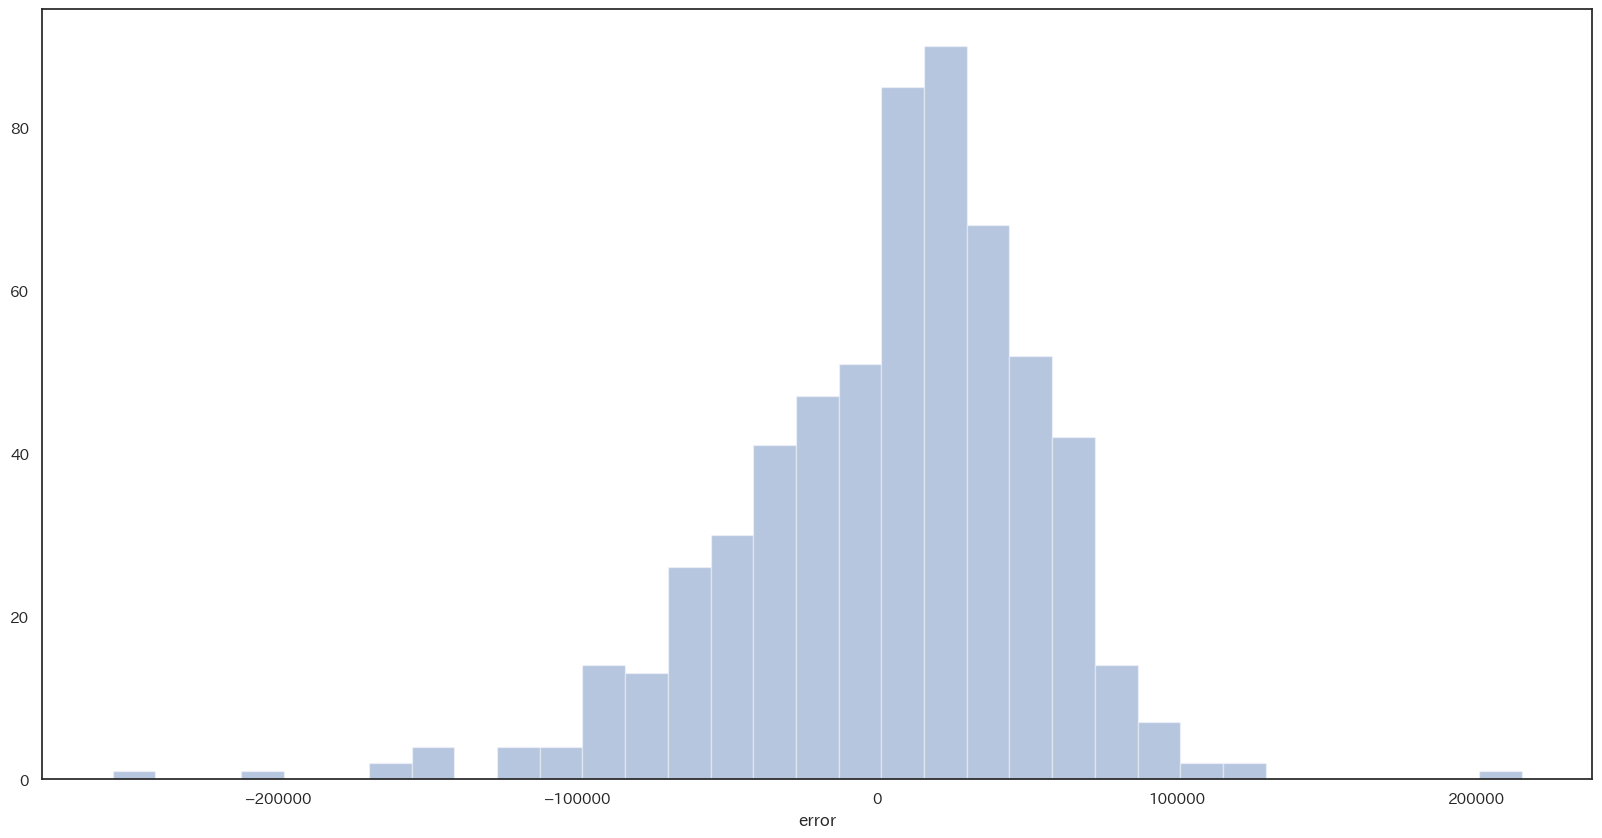

In [178]:
#誤差の分布を確認
fig = plt.subplots(figsize=(20,10))
sns.distplot(X_test["error"], kde=False)

#山が少し右に歪んでおり、きれいな正規分布とは言えない(回帰モデルとしてはまだ不完全)
#小さい誤差は過剰、大きい誤差は不足する傾向はある

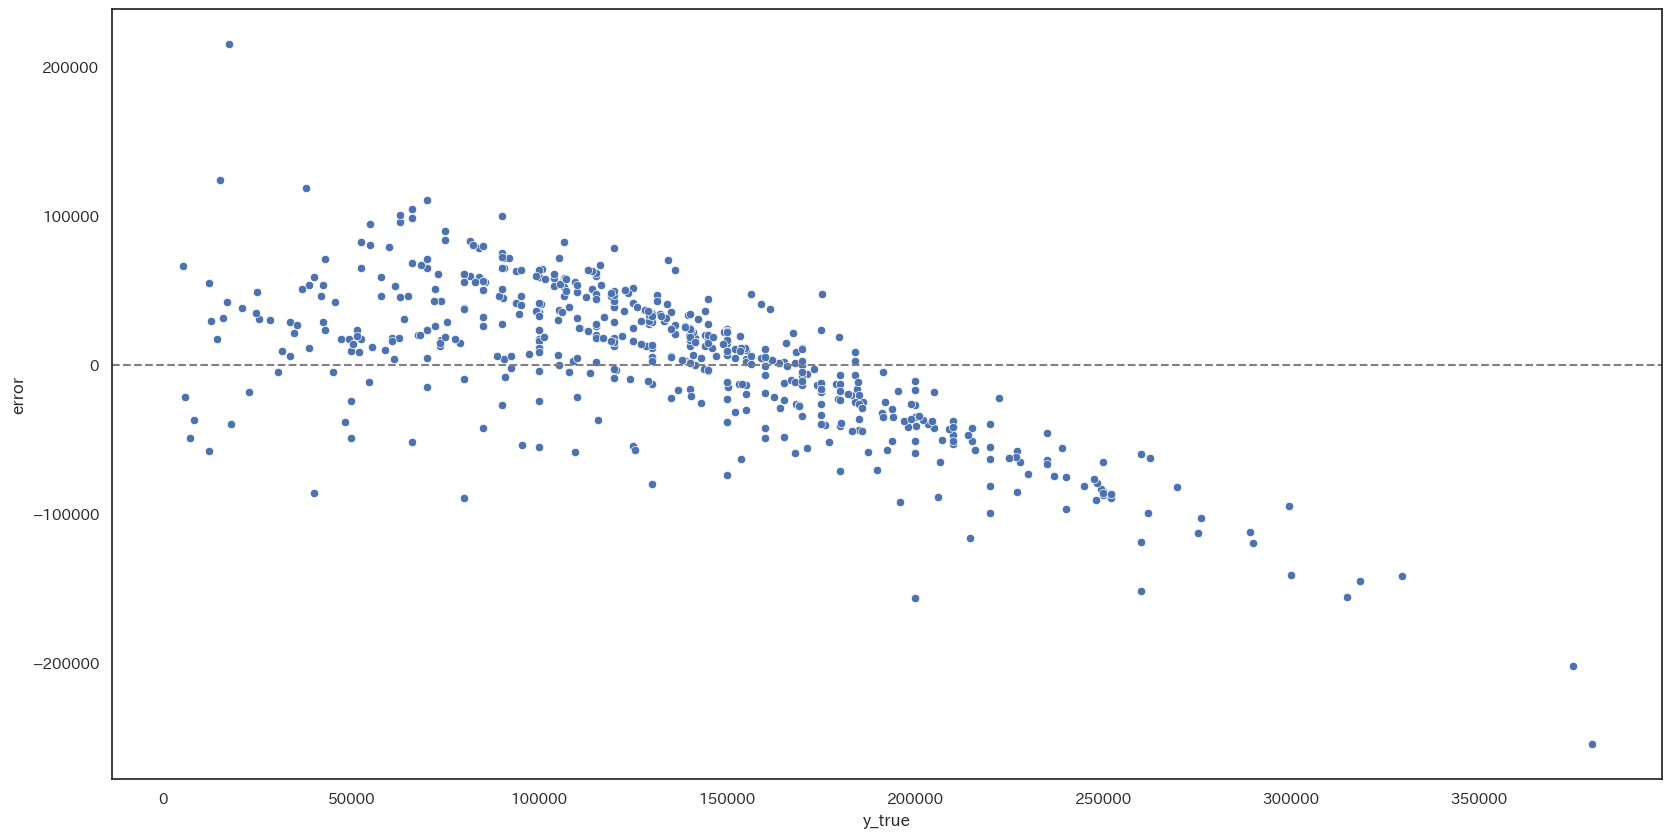

In [179]:
#誤差とsalaryの関係性を確認

fig = plt.subplots(figsize=(20,10))
sns.scatterplot(x="y_true", y="error", data=X_test)
plt.axhline(y=0,c="gray",linestyle="--")

#今のモデルは無難な予測をしすぎて全体の平均値に近い予測をしすぎてしまっている様子(学習不足)
#特徴量とデータを増やしたいところ(job_titleやcompany_locationはテコ入れ可能か)

In [180]:
#submit用の予測モデルを作るためにtrainデータ全てを使用して再学習を実行
df_target = df_train[["job_title", "company_location", "salary"]]
df_target_job_title = df_target.groupby("job_title", as_index=False).mean(numeric_only=True).rename(columns={"salary": "job_title_score"})
df_target_company_location = df_target.groupby("company_location", as_index=False).mean(numeric_only=True).rename(columns={"salary": "company_location_score"})
X = pd.merge(X, df_target_job_title, on="job_title", how="left")
X = pd.merge(X, df_target_company_location, on="company_location", how="left")
X = X.drop(["job_title", "company_location"], axis=1)
df_submit = pd.merge(df_submit, df_target_job_title, on="job_title", how="left")
df_submit = pd.merge(df_submit, df_target_company_location, on="company_location", how="left")
df_submit = df_submit.drop(["job_title", "company_location"], axis=1)

X["job_title_score"] = X["job_title_score"].fillna(X["job_title_score"].median())
X["company_location_score"] = X["company_location_score"].fillna(X["company_location_score"].median())
df_submit["job_title_score"] = df_submit["job_title_score"].fillna(X["job_title_score"].median())
df_submit["company_location_score"] = df_submit["company_location_score"].fillna(X["company_location_score"].median())

lr = LinearRegression() 
lr.fit(X_train, y_train)

LinearRegression()

## 予測

In [182]:
#作成したモデルでsubmitデータを予測
X_submit = df_submit.drop("index", axis=1)
pred = lr.predict(X_submit)
df_submit["y"] = pred
submit_data = df_submit[["index", "y"]].set_index("index")
submit_data.to_csv("ds_salaries_prediction_submit.csv", index=True)
submit_data
#最終スコア51031

,y
index,
2494,155108.319728
2534,156728.015197
380,162665.166960
2472,61437.132820
1876,108828.834007
...,...
1125,155476.670579
150,161045.471491
3024,155108.319728
